In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [12]:
data = pd.read_csv('data/Ch10Ex11.csv', header=None).T
X = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index=data.index)
X

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-1.249561,-0.094068,0.334536,-0.881424,0.371587,-0.110019,0.242435,1.103601,-1.125916,1.219570,...,1.454877,-0.344324,-1.525449,-0.472448,-1.750640,1.008951,-1.234675,-2.302880,1.335060,0.955889
1,0.414348,-1.018945,-0.984806,-1.793100,0.761280,-0.987138,-0.980600,1.354567,-1.189443,-1.049737,...,0.820453,-0.392159,-0.642607,-1.138526,1.806401,2.858077,-0.335958,0.414635,1.207670,1.005695
2,-1.265055,0.439359,0.687712,-0.631725,0.457079,-0.637344,-0.536597,-0.026223,-0.408312,-1.397705,...,-0.457044,-0.468245,1.551948,-1.437778,0.186569,-0.140532,-0.603590,1.523332,0.366470,0.513261
3,1.570888,-1.173889,-0.799929,0.650635,0.421940,-1.034384,-0.419200,0.294534,-1.262531,-1.204191,...,-3.313124,1.428965,0.803720,-0.797555,-0.800702,-1.016415,0.076650,-0.509798,-0.353238,-0.187291
4,0.861236,-0.049191,-1.892717,0.926316,2.119354,-0.589511,1.112690,-2.290450,1.459867,-0.346108,...,-2.567511,-0.314078,-0.103439,1.846474,0.831494,-1.240698,1.030225,1.800789,-0.409756,-0.003659
5,0.265576,2.969249,-2.148229,-0.893103,-0.674200,1.222102,0.276511,0.362244,-1.432763,1.112133,...,0.126364,0.831101,-0.558441,0.960530,0.041499,-1.246859,-0.951648,-0.160167,-1.246212,0.682406
6,-0.138934,-0.781854,-0.012058,-0.227916,-0.790559,-1.854391,-2.081889,-1.641074,-0.403088,0.490433,...,0.301621,0.379918,1.903101,0.838230,2.294940,-0.289243,0.321481,1.050448,-0.713636,0.738279
7,-0.185162,0.290488,1.762823,1.022419,-0.832259,-1.127153,0.854380,0.555850,0.951385,0.889368,...,-0.639918,-0.825902,-0.339552,-0.090965,-0.066474,1.176374,0.535200,0.605707,0.209457,-0.297429
8,-0.072005,-1.314273,-0.128127,-0.192215,-0.908135,-1.652343,0.422947,0.768773,-0.759266,2.366722,...,-0.448023,-0.356198,1.288493,1.408737,0.069196,-0.700178,-1.406795,1.029230,1.586029,3.189920
9,-0.524578,-0.491861,-0.072392,-1.170922,-0.197895,0.555878,-1.099390,-0.540620,0.693263,1.675586,...,-0.207346,-0.333756,-0.165820,-0.678881,0.542267,-0.697951,0.987334,0.398560,0.801395,-2.644551


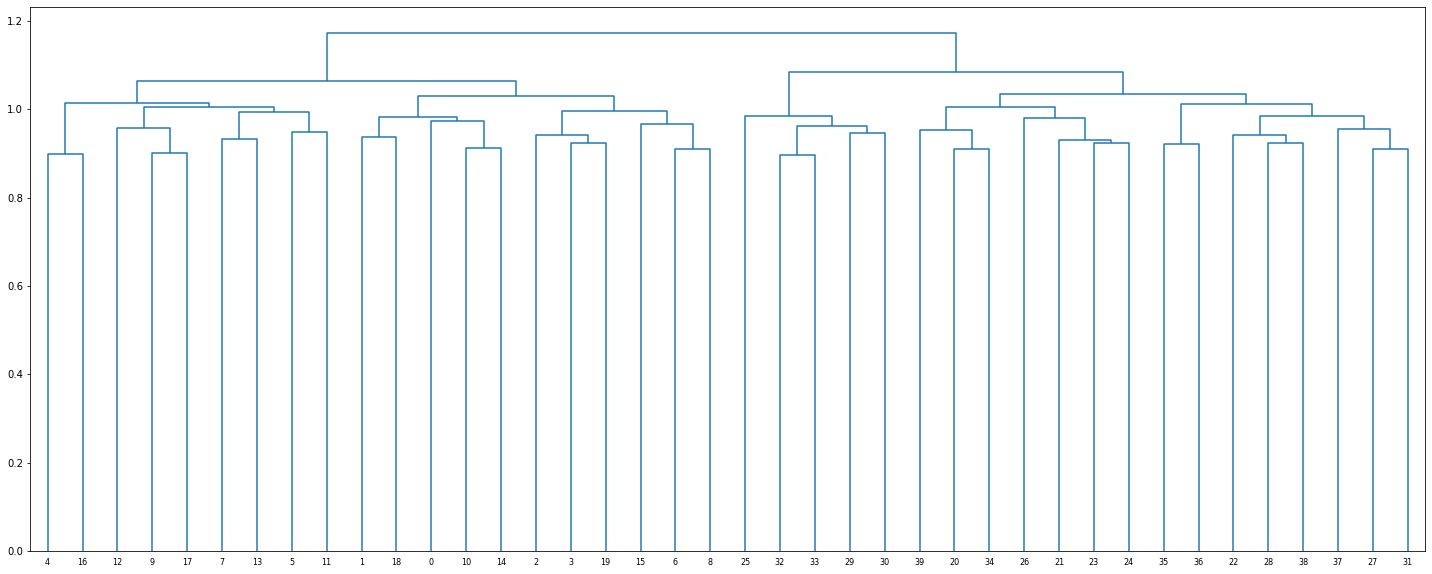

In [13]:
plt.figure(figsize=(25,10))
dendrogram(linkage(y=X, method='complete', metric='correlation'), leaf_rotation=0);

In [16]:
clf_hier = cut_tree(linkage(y=X, method='complete', metric='correlation'), n_clusters=2).flatten()
clf_hier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
cut_tree(linkage(y=X, method='complete', metric='euclidean', ), n_clusters=2).flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

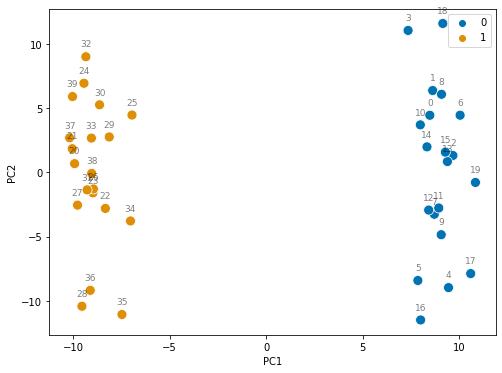

In [19]:
pca = PCA()
pc_names = ['PC{}'.format(x) for x in np.arange(1, 41)]
pc = pca.fit_transform(X)
pc = pd.DataFrame(pc, columns=pc_names, index=X.index)
loadings = pca.components_.T
loadings = pd.DataFrame(loadings, columns=pc_names)

plt.figure(figsize=(8,6))
sb.scatterplot(data=pc, x='PC1', y='PC2', hue=clf_hier, s=100, palette='colorblind')
for x, y, z in zip(pc['PC1'], pc['PC2'], pc.index):
    label = '{}'.format(z)
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='center', size=9, alpha=0.5)
# for i in range(len(X.columns)):
    # plt.arrow(0,0,loadings['PC1'][i]*1.5, loadings['PC2'][i]*1.5, shape='full', width=0.01, color='red')
    # plt.text(loadings['PC1'][i]*1.5*1.2, loadings['PC2'][i]*1.5*1.2, loadings.index[i], size=12, color='green')

In [21]:
# Perfectly correct classification!

## Huraaaaa! I done this book, many thanks to 2 professors from Stanford,
## I really learn alot through this book and Stanford course. 
## I will continue pursue AI, Machine learning and Deep learning for successfull in future! 
## Hura!

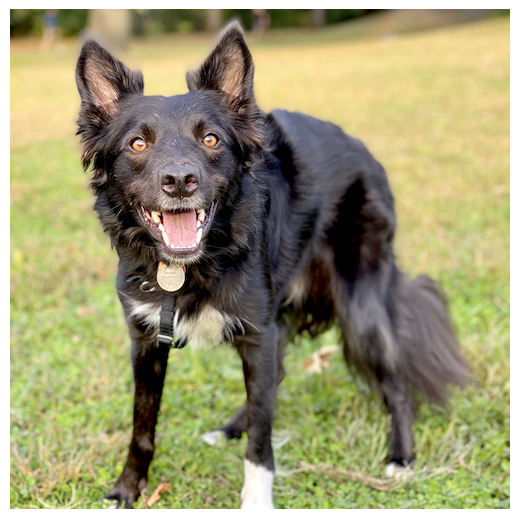

In [39]:
sb.dogplot()